In [1]:
import pandas as pd

In [3]:
a=pd.read_csv('insurance_data.csv')
a.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0, 0.5, 'Bought Insurance')

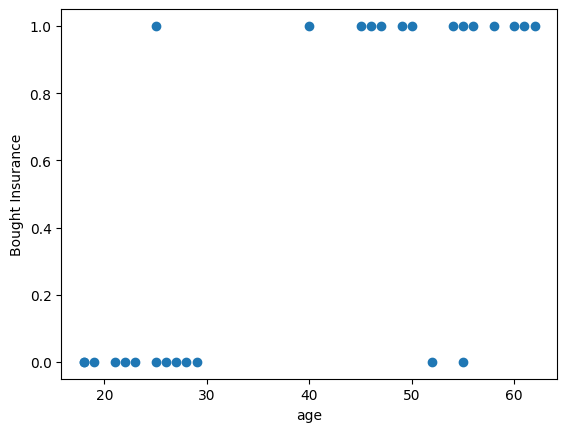

In [4]:
from matplotlib import pyplot as plt
plt.scatter(a.age,a.bought_insurance)
plt.xlabel('age')
plt.ylabel('Bought Insurance')


In [5]:
yes_=a[a.bought_insurance==1]
no_=a[a.bought_insurance==0]

In [94]:
import math
import numpy as np

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [60]:
scaled_age=a.age/100
type(scaled_age)

pandas.core.series.Series

Finding the best fit line

In [76]:
lr.fit(scaled_age.to_frame(),a.bought_insurance.to_frame())

LinearRegression()

In [86]:
m=lr.coef_[0]
m

array([2.36839384])

In [87]:
b=lr.intercept_[0]
b

-0.42094436974983074

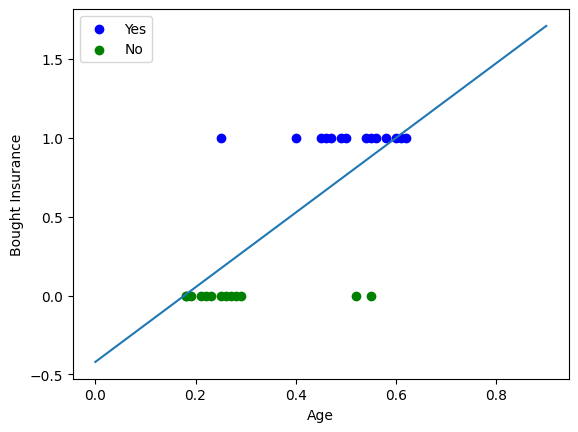

In [110]:
x=np.linspace(0,0.9,600)
y=m*x+b
plt.plot(x,y)
plt.scatter((yes_.age)/100,yes_.bought_insurance,color='blue',label='Yes')
plt.scatter((no_.age)/100,no_.bought_insurance,color='green',label='No')

plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.legend()



From the above graph Y values above 0.5 can be considered yes (i.e 1) but the line does not accurately classify all the data points so we use sigmoid function.

In [137]:
y_from_line=m*scaled_age+b
y_from_line=[0.99 if i>0.5 else 0.1 for i in y_from_line]
y_from_line=np.array(y_from_line)

In [138]:
def cost(y_true,y_pred):
  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

In [139]:

y_true=np.array(a.bought_insurance)
y_from_line

array([0.1 , 0.1 , 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.1 ,
       0.1 , 0.1 , 0.1 , 0.99, 0.99, 0.1 , 0.99, 0.1 , 0.1 , 0.1 , 0.1 ,
       0.99, 0.99, 0.99, 0.99, 0.1 ])

In [140]:
cost(y_true,y_from_line)

0.4741683519741419

In [196]:
Y=m*scaled_age+b


In [187]:
z=1/(1+np.exp(-scaled_age))

In [191]:
z=[0.99 if i>0.59 else 0.1 for i in z]
z=np.array(z)

In [194]:
z

array([0.1 , 0.1 , 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.1 ,
       0.1 , 0.1 , 0.1 , 0.99, 0.99, 0.1 , 0.99, 0.1 , 0.1 , 0.1 , 0.1 ,
       0.99, 0.99, 0.99, 0.99, 0.1 ])

In [192]:
cost(y_true,z)

0.4741683519741419

In [198]:
z=[1 if i==0.99 else 0 for i in z]

In [203]:
import seaborn as sns

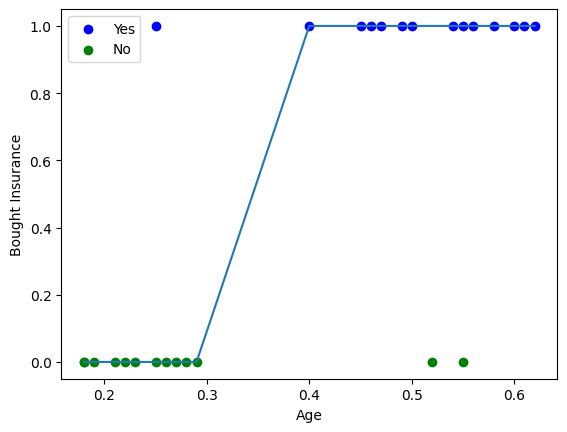

In [206]:
sns.lineplot(x=scaled_age, y=z)
plt.scatter((yes_.age)/100,yes_.bought_insurance,color='blue',label='Yes')
plt.scatter((no_.age)/100,no_.bought_insurance,color='green',label='No')

plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.legend()